In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import time
import itertools

from aquaponics import Aquaponics

In [2]:
def run_gridpoint(T, I, disp=False):
    a = Aquaponics('hydroplant', N0=0.1, T0=T, I0=I)
    m = a.get_model()

    tf = 45
    steps = tf * 10 + 1
    m.time = np.linspace(0,tf,steps)

    a.solve(glamdring=True, imode=7, disp=disp)
    
    return m.options.APPSTATUS, a.Nup.value[-1], m, a

In [3]:
Tmin = 16
Tmax = 40
Tstep = 1
Ts = np.arange(Tmin, Tmax + Tstep, Tstep)
Imin = 4
Imax = 18
Istep = 1
Is = np.arange(Imin, Imax + Istep, Istep)
exps = list(itertools.product(Ts, Is))
print('Number of T\'s: {}'.format(len(Ts)))
print('Number of I\'s: {}'.format(len(Is)))
print('Number of Experiments: {}'.format(len(exps)))
print('----')

rs = {}
for i, exp in enumerate(exps):
    T = exp[0]
    I = exp[1]
    sys.stdout.write('\rRunning T={:.1f}, I={:.1f} ({}/{})'.format(T, I, i + 1, len(exps)))
    
    status, obj, m, a = run_gridpoint(T, I * 1e6, disp=False)
    if status == 1:
        sub = rs.get(T, {})
        sub[I] = obj
        rs[T] = sub
    
print('\nDone')

Number of T's: 25
Number of I's: 15
Number of Experiments: 375
----
Running T=40.0, I=18.0 (375/375)
Done


In [4]:
grid = np.zeros((len(Ts), len(Is)))
for Ti, T in enumerate(Ts):
    for Ii, I in enumerate(Is):
        grid[Ti, Ii] = rs.get(T, {}).get(I, 0)   

print(grid)

[[33.00202 29.77187 27.70483 26.26016 25.18889 24.36063 23.70006 23.16036
  22.71082 22.33041 22.00419 21.72129 21.47355 21.25477 21.06014]
 [33.13801 29.8456  27.74676 26.28569 25.20524 24.37144 23.70729 23.16517
  22.71392 22.33225 22.00509 21.72146 21.47315 21.25392 21.05891]
 [33.28556 29.92881 27.79401 26.31379 25.22251 24.38213 23.71373 23.16872
  22.71543 22.33226 22.00397 21.71947 21.47048 21.2507  21.05524]
 [33.44318 30.02274 27.84821 26.34586 25.24185 24.39368 23.72024 23.17179
  22.71606 22.3311  22.00147 21.71592 21.46611 21.24566 21.04967]
 [33.60858 30.12801 27.91091 26.38339 25.26453 24.40717 23.72774 23.1752
  22.71656 22.32947 21.99823 21.71143 21.46063 21.2394  21.04276]
 [33.77899 30.24442 27.9834  26.42784 25.29185 24.42374 23.73723 23.17984
  22.71775 22.32811 21.99494 21.70665 21.45467 21.23249 21.03507]
 [33.95146 30.3709  28.06652 26.48062 25.3252  24.44458 23.74977 23.18664
  22.72044 22.32778 21.99231 21.70224 21.44885 21.22553 21.02718]
 [34.12316 30.50557 2

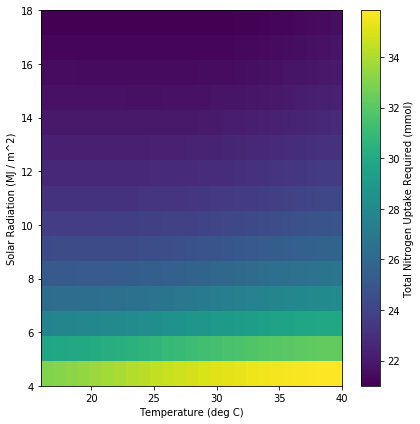

In [7]:
plt.figure(figsize=(6,6))
im = plt.imshow(grid.T, extent=[Tmin, Tmax, Imin, Imax], origin='lower')
ax = plt.gca()
ax.set_aspect('auto')
cb = plt.colorbar(im, ax=ax)
cb.set_label('Total Nitrogen Uptake Required (mmol)')
plt.ylabel('Solar Radiation (MJ / m^2)')
plt.xlabel('Temperature (deg C)')
plt.tight_layout(h_pad=1)